In [3]:
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt

TRAIN_DATA_PATH = "../input/amex-default-prediction/train_data.csv"
chunksize = 13000
df_train_raw_chunks = pd.read_csv(TRAIN_DATA_PATH, chunksize=chunksize)
df_train_raw_ch = df_train_raw_chunks.__next__()
df_train_raw_ch.head()



,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,...,D_136,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-03-09,0.938469,0.001733,0.008724,1.006838,0.009228,0.124035,0.008771,0.004709,...,NaN,NaN,NaN,0.002427,0.003706,0.003818,NaN,0.000569,0.000610,0.002674
1,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-04-07,0.936665,0.005775,0.004923,1.000653,0.006151,0.126750,0.000798,0.002714,...,NaN,NaN,NaN,0.003954,0.003167,0.005032,NaN,0.009576,0.005492,0.009217
2,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-05-28,0.954180,0.091505,0.021655,1.009672,0.006815,0.123977,0.007598,0.009423,...,NaN,NaN,NaN,0.003269,0.007329,0.000427,NaN,0.003429,0.006986,0.002603
3,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-06-13,0.960384,0.002455,0.013683,1.002700,0.001373,0.117169,0.000685,0.005531,...,NaN,NaN,NaN,0.006117,0.004516,0.003200,NaN,0.008419,0.006527,0.009600
4,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-07-16,0.947248,0.002483,0.015193,1.000727,0.007605,0.117325,0.004653,0.009312,...,NaN,NaN,NaN,0.003671,0.004946,0.008889,NaN,0.001670,0.008126,0.009827


In [11]:
sample_customer_id = np.random.choice(df_train_raw_ch['customer_ID'])
customer_data_ex = df_train_raw_ch[df_train_raw_ch["customer_ID"] == sample_customer_id]
customer_data_ex.head()

,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,...,D_136,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145
9592,0072c49b177d98c4e0348e7af8da5cdf8c5a8ed42a63cb...,2017-11-25,0.249809,0.007598,0.006262,0.811771,0.007248,NaN,0.002876,0.002599,...,NaN,NaN,NaN,0.003409,0.003994,0.006270,NaN,0.004116,0.005083,0.007944
9593,0072c49b177d98c4e0348e7af8da5cdf8c5a8ed42a63cb...,2017-12-26,0.293042,0.006089,0.003321,0.814312,0.006138,NaN,0.009872,0.000484,...,NaN,NaN,NaN,0.002959,0.004826,0.004203,NaN,0.001958,0.007921,0.005252
9594,0072c49b177d98c4e0348e7af8da5cdf8c5a8ed42a63cb...,2018-01-05,0.229651,0.009516,0.008087,0.810060,0.004278,0.182904,0.001789,0.008142,...,NaN,NaN,NaN,0.000684,0.006790,0.003043,NaN,0.002755,0.001163,0.003913
9595,0072c49b177d98c4e0348e7af8da5cdf8c5a8ed42a63cb...,2018-02-14,0.308383,0.001608,0.025321,0.813752,0.005371,0.181466,0.009259,0.008218,...,NaN,NaN,NaN,0.007196,0.005152,0.005813,NaN,0.006680,0.002326,0.008169
9596,0072c49b177d98c4e0348e7af8da5cdf8c5a8ed42a63cb...,2018-03-13,0.135408,0.563141,0.050442,1.007212,0.004003,0.236597,0.008771,0.001676,...,NaN,NaN,NaN,0.009228,0.002057,0.004529,NaN,0.005391,0.006969,0.001302


In [12]:
import gc 

del df_train_raw_chunks, df_train_raw_ch, customer_data_ex, sample_customer_id
gc.collect()

136

Reading a compressed dataset

In [4]:
train_data = pd.read_parquet('../input/amex-parquet/train_data.parquet')
train_labels = pd.read_csv('../input/amex-default-prediction/train_labels.csv')
train_labels.head()

,customer_ID,target
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0
1,00000fd6641609c6ece5454664794f0340ad84dddce9a2...,0
2,00001b22f846c82c51f6e3958ccd81970162bae8b007e8...,0
3,000041bdba6ecadd89a52d11886e8eaaec9325906c9723...,0
4,00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8a...,0


In [5]:
train_data = train_data.merge(train_labels, left_on='customer_ID', right_on='customer_ID')
train_data.shape

(5531451, 192)

EDA 

Columns in the dataset are divided by the organisers in the following groups:
D_*: Delinquency variables
S_*: Spend variables
P_*: Payment variables
B_*: Balance variables
R_*: Risk variables
Following features are categorical: B_30, B_38, D_63, D_64, D_66, D_68, D_114, D_116, D_117, D_120, D_126.

In [6]:
train_data['S_2'] = pd.to_datetime(train_data['S_2'])
print(train_data['S_2'])

0         2017-03-09
1         2017-04-07
2         2017-05-28
3         2017-06-13
4         2017-07-16
             ...    
5531446   2017-11-05
5531447   2017-12-23
5531448   2018-01-06
5531449   2018-02-06
5531450   2018-03-14
Name: S_2, Length: 5531451, dtype: datetime64[ns]


In [7]:
print(f'Train dates range is from {train_data["S_2"].min()} to {train_data["S_2"].max()}.')

Train dates range is from 2017-03-01 00:00:00 to 2018-03-31 00:00:00.


In [8]:
categorical_features = ['B_30', 'B_38', 'D_63', 'D_64', 'D_66', 'D_68', 'D_114', 'D_116', 'D_117', 'D_120', 'D_126']
train_data[categorical_features] = train_data[categorical_features].astype("category")
train_data[categorical_features].dtypes

B_30     category
B_38     category
D_63     category
D_64     category
D_66     category
D_68     category
D_114    category
D_116    category
D_117    category
D_120    category
D_126    category
dtype: object

In [13]:
feat_Delinquency = [c for c in train_data.columns if c.startswith('D_')]
feat_Spend = [c for c in train_data.columns if c.startswith('S_')]
feat_Payment = [c for c in train_data.columns if c.startswith('P_')]
feat_Balance = [c for c in train_data.columns if c.startswith('B_')]
feat_Risk = [c for c in train_data.columns if c.startswith('R_')]
print(f'Total number of Delinquency variables: {len(feat_Delinquency)}')
print(f'Total number of Spend variables: {len(feat_Spend)}')
print(f'Total number of Payment variables: {len(feat_Payment)}')
print(f'Total number of Balance variables: {len(feat_Balance)}')
print(f'Total number of Risk variables: {len(feat_Risk)}')

Total number of Delinquency variables: 96
Total number of Spend variables: 22
Total number of Payment variables: 3
Total number of Balance variables: 40
Total number of Risk variables: 28


In [14]:
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px

labels=['Delinquency', 'Spend','Payment','Balance','Risk']
values= [len(feat_Delinquency), len(feat_Spend),len(feat_Payment), len(feat_Balance),len(feat_Risk)]

In [15]:
fig = go.Figure()
fig.add_trace(go.Pie(values = values,labels = labels,hole = 0.6, 
                     hoverinfo ='label+percent'))
fig.update_traces(textfont_size = 12, hoverinfo ='label+percent',textinfo ='label', 
                  showlegend = False,marker = dict(colors =["#70d6ff","#ff9770"]),
                  title = dict(text = 'Feature Distribution'))  
fig.show()

Missing data 

In [22]:
missing_values = train_data.isna().sum()
print("Total missing values" , sum(missing_values))

Total missing values 160858968


Distribution of missing values across parameters

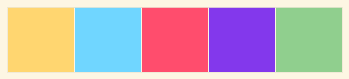

In [29]:
#Custom Color Palette 🎨
custom_colors = ["#ffd670","#70d6ff","#ff4d6d","#8338ec","#90cf8e"]
customPalette = sns.set_palette(sns.color_palette(custom_colors))
sns.palplot(sns.color_palette(custom_colors),size=1.2)
plt.tick_params(axis='both', labelsize=0, length = 0)

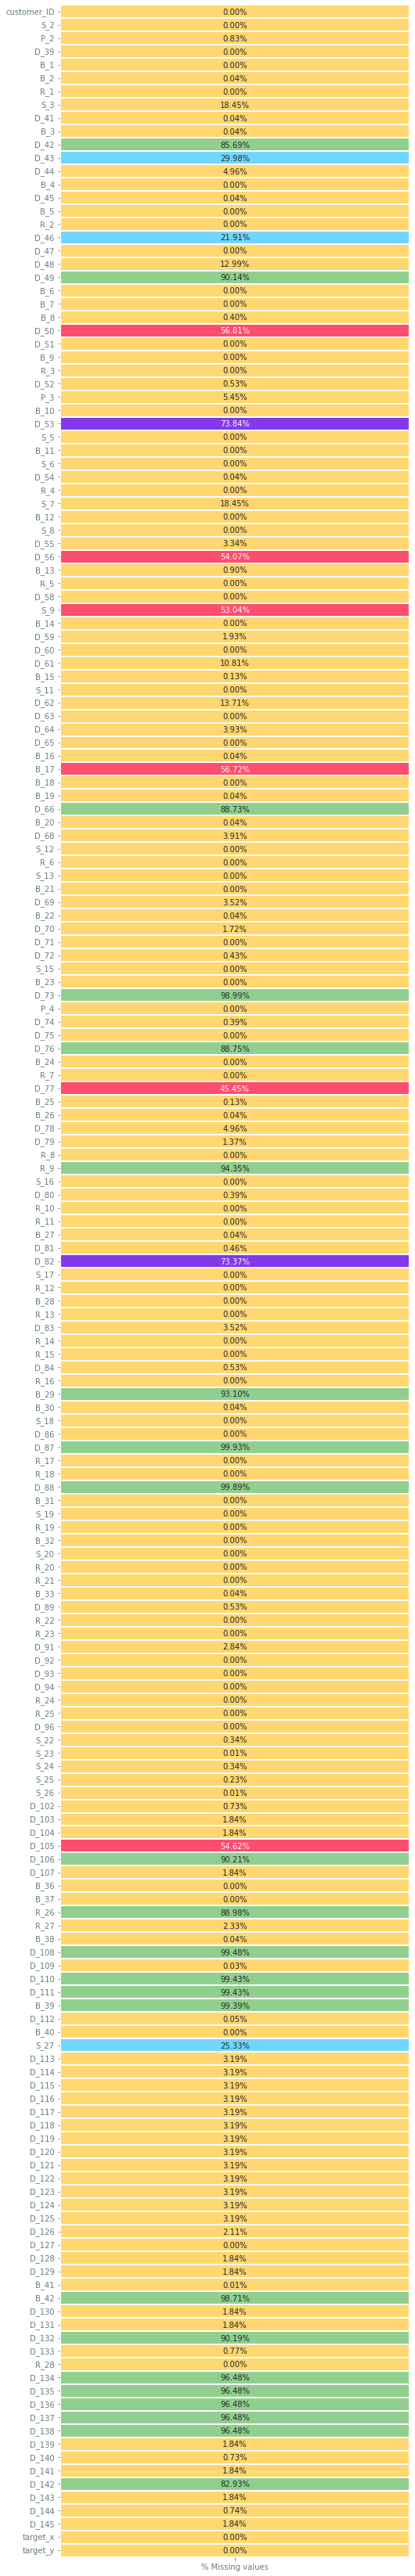

In [30]:
background_color = 'white'
missing = pd.DataFrame(columns = ['% Missing values'],data = train_data.isnull().sum()/len(train_data))
fig = plt.figure(figsize = (20, 60),facecolor=background_color)
gs = fig.add_gridspec(1, 2)
gs.update(wspace = 0.5, hspace = 0.5)
ax0 = fig.add_subplot(gs[0, 0])
for s in ["right", "top","bottom","left"]:
    ax0.spines[s].set_visible(False)
sns.heatmap(missing,cbar = False,annot = True,fmt =".2%", linewidths = 2,cmap = custom_colors,vmax = 1, ax = ax0)
plt.show()


In [37]:
stat_plot = train_data.reset_index().groupby('S_2')['customer_ID'].nunique().reset_index()
fig = go.Figure()
fig.add_trace(go.Scatter(x = stat_plot['S_2'], y = stat_plot['customer_ID']))
fig.update_layout(title="Customer Statements", width = 800, height = 600,xaxis_title ='Statement Date',
                  paper_bgcolor='rgb(0,0,0,0)',plot_bgcolor='rgb(0,0,0,0)') 
fig['data'][0]['line']['color']="#ff9770"
fig.show()

Distribution of target variable

In [39]:
import gc
gc.collect()

54

In [41]:
del_cols = [c for c in train_data.columns if (c.startswith(('D','t'))) & (c not in categorical_features)]
df_del = train_data[del_cols]
spd_cols = [c for c in train_data.columns if (c.startswith(('S','t'))) & (c not in categorical_features)]
df_spd = train_data[spd_cols]
pay_cols = [c for c in train_data.columns if (c.startswith(('P','t'))) & (c not in categorical_features)]
df_pay = train_data[pay_cols]
bal_cols = [c for c in train_data.columns if (c.startswith(('B','t'))) & (c not in categorical_features)]
df_bal = train_data[bal_cols]
ris_cols = [c for c in train_data.columns if (c.startswith(('R','t'))) & (c not in categorical_features)]
df_ris = train_data[ris_cols]

In [ ]:
fig, axes = plt.subplots(29, 3, figsize = (35,150))
for i, ax in enumerate(axes.reshape(-1)):
    if i < len(del_cols) - 1:
        sns.kdeplot(x = del_cols[i], data = df_del, fill = True, ax = ax, palette =["#e63946","#8338ec"])
        ax.tick_params()
        ax.xaxis.get_label()
        ax.set_ylabel('')
fig.suptitle('Distribution of Delinquency Variables', fontsize = 35, x = 0.5, y = 1)
plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize =(11,11))
corr = df_del.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))
sns.heatmap(corr, mask = mask, robust = True, center = 0,square = True, linewidths =.6, cmap = custom_colors)
plt.title('Correlation of Delinquency Variables')
plt.show()